## Mud card questions
- **Can you please explain more why p_crit = 0 means all points are predicted class 1?**
    - we worked with the class 1 predicted probabilities
    - if the class 1 predicted probability (our critical probability) is 0, that point is predicted to be in class 0
- **"I don't know what's the area of ROC means. Could you elaborate using examples?**
    - it's the integral of the ROC curve
- **I am sort of wondering why update p_crit every time using the p_crit in the dataset? Should we use every p in the range of [0,1]?**
    - there are an uncountable infinite numbers between 0 and 1, you can't possible use **every** p in the range :)
- **Can the regression metrics be used on classification problems?**
    - Nope!
    - choose a regression metric for your regression problem and a classification metric for your classification problem
- **Is the p_crits determined by us? If so, how to set the range of the critical probabilities appropriately?**
    - yes, check the lecture notes
    - it is the sorted list of the predicted probabilities
- **is there a package we can use to more efficiently build ROC curves? or do we only use loops**
    - yes, check the lecture notes
    - sklearn has an roc_curve function
- **What is the difference between MSE and R2? Which is better to use?**
- **MSE and R2 score are both using for evaluate how perfect the model is, which one is preferred to be used in general?**
    - MSE is the mean squared error, it's unit is the square of the target variable's unit
        - if the target variable is square feet, the MSE unit will be feet on the power of 4
        - if the target variable is in dollars, MSE will be dollar squared
    - R2 is the coefficient of determination and it is dimensionless
        - 1 minus the ratio of MSE to variance
    - it depends on your problem and your personal preference which one is better to use
    - bith metrics are pretty often used
- **I was a bit unclear about the tpr and fpr section of classification. My project is heavily unbalanced so I will need to look into this more.**
    - if your project is imbalanced, do not use the ROC curve
    - use the PR curve instead
- **What does dimensionless mean?**
    - it has no units
    - check [wiki](https://en.wikipedia.org/wiki/Dimensionless_quantity)
- **"I didnt understand the significance of R2 = 0**
    - R2 = 0 means that your regression model performs just as well as a simple baseline model
    - the simple baseline is that you predict the mean value of the training set target variable for each point in your validation and test sets
- **I was confused about the logloss equation and when to use it, and what it exactly shows!**
    - you should use it wen you care most about accurately predicting the probabilities
    - check [sklearn](https://scikit-learn.org/stable/modules/model_evaluation.html#log-loss)
- **how to calculate the integral of the ROC curve?**
    - sklearn's roc_auc_score function does it for you
- **Are regression metrics more or less difficult when dealing with time series data. It could be that other features besides the absolute difference are informative of what the model has learned in these situations.**
    - if that's the case in your project, choose another more appropriate metric
- **is sklearn the best package in python to use for machine learning?**
    - yes :)
    - I'm not aware of any other package that would be even remotely as comprehensive as sklearn
    - even if you end up working with deep learning tools like keras, tensorflow, pytorch, you will likely still use sklearn to some degree
    

## Revisit the PR curve

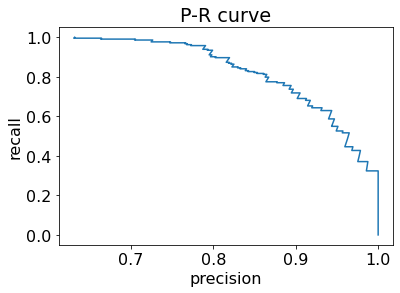

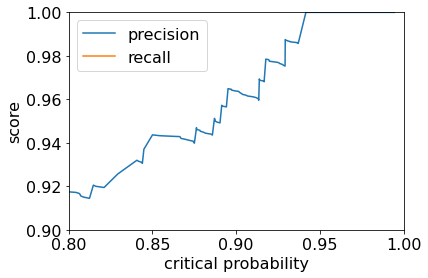

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from sklearn.metrics import confusion_matrix
matplotlib.rcParams.update({'font.size': 16})

df = pd.read_csv('data/true_labels_pred_probs.csv')

y_true = df['y_true']
pred_prob_class1 = df['pred_prob_class1']

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score # the AUC of the P-R curve

p,r,p_crits = precision_recall_curve(y_true,pred_prob_class1)

plt.plot(p,r)
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('P-R curve')
plt.show()

plt.plot(p_crits,p[:-1],label='precision')
plt.plot(p_crits,r[:-1],label='recall')
plt.xlabel('critical probability')
plt.ylabel('score')
#plt.xlim([0.8,1]) # uncomment these two lines to focus on part of the precision curve
#plt.ylim([0.9,1])
plt.legend()
plt.show()


One interesting property of ROC curves is that they are monotonically increasing – if you decrease the threshold, both the number of true positives and the number of false positives cannot decrease, they can only increase or stay the same. this gives ROC curves an intuitive shape. this does not hold for PR curves because precision can go in either direction as you change the threshold. this is why PR curves sometimes look jaggedy.

https://bbabenko.github.io/prs/

## Supervised ML algorithms, part 1

By the end of this lecture, you will be able to
- describe the main components of any ML algorithm
- describe how linear regression works
- describe how logistic regression works


## <font color='LIGHTGRAY'>Supervised ML algorithms, part 1 </font>

<font color='LIGHTGRAY'>By the end of this lecture, you will be able to</font>
- **describe the main components of any ML algorithm**
- <font color='LIGHTGRAY'>describe how linear regression works</font>
- <font color='LIGHTGRAY'>describe how logistic regression works</font>


## The supervised ML pipeline
The goal: Use the training data (X and y) to develop a <font color='red'>model</font> which can <font color='red'>accurately</font> predict the target variable (y_new') for previously unseen data (X_new).

**1. Exploratory Data Analysis (EDA)**: you need to understand your data and verify that it doesn't contain errors
   - do as much EDA as you can!
    
**2. Split the data into different sets**: most often the sets are train, validation, and test (or holdout)
   - practitioners often make errors in this step!
   - you can split the data randomly, based on groups, based on time, or any other non-standard way if necessary to answer your ML question

**3. Preprocess the data**: ML models only work if X and Y are numbers! Some ML models additionally require each feature to have 0 mean and 1 standard deviation (standardized features)
   - often the original features you get contain strings (for example a gender feature would contain 'male', 'female', 'non-binary', 'unknown') which needs to transformed into numbers
   - often the features are not standardized (e.g., age is between 0 and 100) but it needs to be standardized
    
**4. Choose an evaluation metric**: depends on the priorities of the stakeholders
   - often requires quite a bit of thinking and ethical considerations
     
<span style="background-color: #FFFF00">**5. Choose one or more ML techniques**: it is highly recommended that you try multiple models</span>
   - start with simple models like linear or logistic regression <span style="background-color: #FFFF00">**- THIS WEEK**</span>
   - try also more complex models like nearest neighbors, support vector machines, random forest, etc.
    
**6. Tune the hyperparameters of your ML models (aka cross-validation)**
   - ML techniques have hyperparameters that you need to optimize to achieve best performance
   - for each ML model, decide which parameters to tune and what values to try
   - loop through each parameter combination
       - train one model for each parameter combination
       - evaluate how well the model performs on the validation set
   - take the parameter combo that gives the best validation score
   - evaluate that model on the test set to report how well the model is expected to perform on previously unseen data
    
**7. Interpret your model**: black boxes are often not useful
   - check if your model uses features that make sense (excellent tool for debugging)
   - often model predictions are not enough, you need to be able to explain how the model arrived to a particular prediction (e.g., in health care)

## Supervised ML algorithms: three parts
- 1) **a mathematical model ($f$)** is used to convert the feature values into a prediction

$f(X_i) = y_i'$, where $i$ is the $i$th data point in our sample. $X_i$ is a vector and $y_i'$ is a number.
    - $f$ is your supervised ML algorithm
    - it usually has a number of intrinsic parameters 
- 2) **an optimization algorithm** is used to determine the intrinsic parameter values given the training set 
    - there are various algorithms
    - e.g., gradient descent, backpropagation
- 3) the optimization algorithm minimizes a metric called **the cost function**
    - the cost function is used to determine the best intrinsic parameters of one model based on the training data
    - it is not the same as the evaluation metric
        - you use the evlaution metric to compare various models
        - the model uses the cost function to find the best values of its intrinsic parameters
        - keep in mind though that the same metric can be used as the cost function and the evaluation metric (e.g., MSE in regression) but that's not necessarily the case (e.g., the cost function is MSE but you use R2 as an evaluation metric).

## <font color='LIGHTGRAY'>Supervised ML algorithms, part 1 </font>

<font color='LIGHTGRAY'>By the end of this lecture, you will be able to</font>
- <font color='LIGHTGRAY'>describe the main components of any ML algorithm</font>
- **describe how linear regression works**
- <font color='LIGHTGRAY'>describe how logistic regression works</font>


## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression # import the model
LinReg = LinearRegression() # initialize a simple linear regression model 
LinReg.fit(X_train,y_train) # we will learn now what happens when you issue this line in regression

- This is the mathematical model:
    ### <center>$f(X_i) = y_i' = \theta_0 + X_{i1} \theta_1 + X_{i2} \theta_2 +$ ... $= \theta_0 + \sum_{j=1}^{m} \theta_j  X_{ij} $</center>
 <center>where $y_i'$ is the prediction of the linear regression model and $\theta$ are parameters.</center>
- The cost function is MSE
- We will find the best parameter values by brute force first, then simple gradient descent.

## Let's generate some data

In [6]:
# load packages and generate data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
from sklearn.datasets import make_regression
matplotlib.rcParams.update({'font.size': 16})

# fix the seed so code is reproducable
np.random.seed(1)

# generate n_samples points
n_samples = 30

# generate data
X, y, coef = make_regression(n_samples = n_samples, n_features = 1, coef = True, noise= 10, bias=0)
print(coef) # the coefficients of the underlying linear model, the bias is 0.
print(np.dot(X,coef)[:,0]) # noise is added to the label
print(y)
df = pd.DataFrame()
df['x1'] = X[:,0]
df['y'] = y
print(df.head())
df.to_csv('data/regression_example.csv',index=False)

28.777533858634875
[  9.18115839 -30.87739085  24.90429735  -4.96205858  32.94232532
  14.46054785 -66.23260778 -19.67600162 -11.0521372  -25.26260034
 -59.28576902 -31.67310564 -31.65215819  32.62708851  50.21137962
  -3.53647763 -26.92913658  46.7446537   42.07586066  25.94555749
 -21.90565736  15.2623224  -15.19948048  -7.70915828  16.77198455
   1.21480753  25.92441258  -7.17626442 -17.60484091  -9.27837201]
[  3.08130585 -48.2639338   25.93592732   1.87178372  45.4428258
   6.88380644 -72.44927625 -16.20740827 -12.15967691 -25.0337406
 -66.76530644 -35.83422144 -27.17695128  53.04737598  52.96856006
  10.13384942 -20.19197583  36.16208808  58.99412194  38.42855536
 -32.81240623   6.77988325 -15.82439642 -20.62478531  18.61129032
   9.78715027  31.80735422  -4.11214063 -11.04200012 -15.08634424]
         x1          y
0  0.319039   3.081306
1 -1.072969 -48.263934
2  0.865408  25.935927
3 -0.172428   1.871784
4  1.144724  45.442826


In [7]:
def predict(X,theta):
    if len(np.shape(theta)) != 2:
        theta = np.array(theta)[np.newaxis,:] # just a numpy trick to make the dot product work
    y_pred = theta[0,0] + X.dot(theta[0,1:]) # intercept + theta_i*x_i    
    return y_pred

def cost_function(X,y_true,theta):
    """
    Take in a numpy array X,y_true, theta and generate the cost function
    of using theta as parameter in a linear regression model
    """
    m = len(y)
    theta = np.array(theta)[np.newaxis,:] # just a numpy trick to make the dot product work in predict
    y_pred = predict(X,theta)
    cost = (1/m) * np.sum(np.square(y_true-y_pred)) # this is MSE
    return cost

#### <center>$y_i' = \theta_0 + x_{i1} \theta_1$</center>
- $\theta_0$ is the intercept
- $\theta_1$ is the slope

#### We are looking for the best fit line!

For a given $\theta$ vector, the cost function returns the MSE.

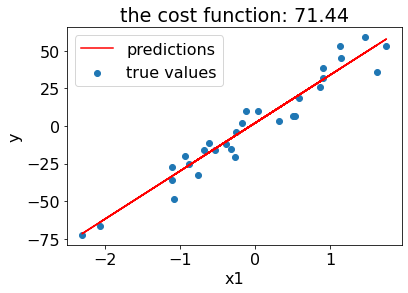

In [17]:
theta = [2,32] # intercept is theta[0], the slope is theta[1]

plt.scatter(df['x1'],df['y'],label='true values')
plt.plot(df['x1'],predict(df['x1'].values[:,np.newaxis],theta),label='predictions',color='r')
plt.title('the cost function: '+str(np.around(cost_function(df['x1'].values[:,np.newaxis],df['y'],theta),2)))
plt.xlabel('x1')
plt.ylabel('y')
plt.legend()
plt.savefig('figures/line_fit.png',dpi=300)
plt.show()


## What we want:
- Find the theta vector that minimizes the cost function!
   - that's our best fit model
   
## How we do it:
- brute force
   - create a grid of theta[0] and theta[1] values
   - loop through all theta vectors on the grid
   - find the theta vector that comes with the smallest cost

In [16]:
n_vals = 101

theta0 = np.linspace(-100,100,n_vals) # the intercept values to explore
theta1 = np.linspace(-100,100,n_vals) # the slope values to explore

cost = np.zeros([len(theta0),len(theta1)]) # the cost function's value for each theta

# loop through all intercept-slope combinations and calculate the cost function
for i in range(n_vals):
    for j in range(n_vals):
        theta = [theta0[i],theta1[j]]
        cost[i,j] = cost_function(df['x1'].values[:,np.newaxis],df['y'],theta)
        
print('min(cost):',np.min(cost))
min_coords = np.unravel_index(cost.argmin(),np.shape(cost))
print('best intercept:',theta0[min_coords[0]])
print('best slope:',theta1[min_coords[1]])


min(cost): 71.43643291686587
best intercept: 2.0
best slope: 32.0


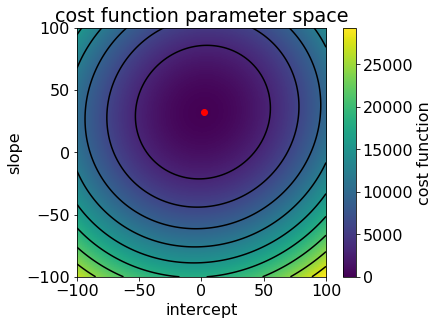

In [6]:
plt.figure(figsize=(6.4,4.8))
ax = plt.gca()
extent = (np.min(theta0),np.max(theta0),np.min(theta1),np.max(theta1))
fig = ax.imshow(cost.T,origin='lower',extent=extent,vmin=0)
plt.colorbar(fig,label='cost function')
ax.contour(theta0,theta1,cost.T,levels=10,colors='black')
plt.scatter(theta0[min_coords[0]],theta1[min_coords[1]],c='r')
ax.xaxis.set_ticks_position("bottom")
plt.xlabel('intercept')
plt.ylabel('slope')
plt.title('cost function parameter space')
plt.tight_layout()
plt.savefig('figures/cost_function.png',dpi=300)
plt.show()

<center><img src="figures/cost_function.png" width="600"></center>


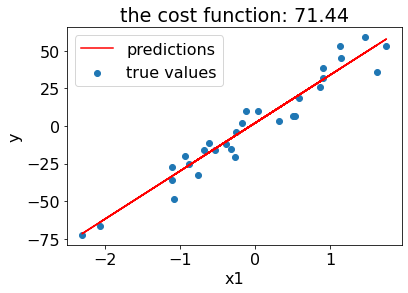

In [7]:
theta = [2,32] # intercept is theta[0], the slope is theta[1]

plt.scatter(df['x1'],df['y'],label='true values')
plt.plot(df['x1'],predict(df['x1'].values[:,np.newaxis],theta),label='predictions',color='r')
plt.title('the cost function: '+str(np.around(cost_function(df['x1'].values[:,np.newaxis],df['y'],theta),2)))
plt.xlabel('x1')
plt.ylabel('y')
plt.legend()
plt.savefig('figures/line_fit.png',dpi=300)
plt.show()


## Quiz 1

### The brute force approach works but...

- the number of theta vectors to loop through explodes with the number of features we have
   - with n features, we would need to loop through ~ $100^n$ theta vectors.
   - no guarantee that the best theta vector is within our grid.
- We need to use a smarter numerical method to find the best theta!
   - gradient descent to the rescue!

### How do we find the best $\theta$ values?
- start with arbitrary initial $\theta$ values and the cost function L
- repeat until convergence:
<center>$\theta_j := \theta_j - l \frac{\partial L(\theta)}{\partial \theta_j} $, </center>
<center>where $\frac{\partial L(\theta)}{\partial \theta_j}$ is the gradient of the cost function at the current $\theta$ location and $l$ is the learning rate.</center>

   - the gradient tells us which way the cost function is the steepest
   - the learning rate tells us how big of a step we take in that direction

In [18]:
def gradient_descent(X,y_true,theta,learning_rate=0.01,iterations=100):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y_true)
    theta = np.array(theta)[np.newaxis,:]

    cost_history = np.zeros(iterations)
    theta_history = np.zeros([iterations,np.shape(theta)[1]])
    for it in range(iterations):
        
        y_pred = predict(X,theta)
        delta_theta = np.zeros(np.shape(theta)) # the step we take 
        # the derivative of the cost function with respect to the intercept
        delta_theta[0,0] = (1/m) * sum(y_pred - y_true) *learning_rate
        # the derivative of the cost function with respect to the slopes * learning_rate
        delta_theta[0,1:] = (1/m)*learning_rate*( X.T.dot((y_pred - y_true)))
        theta = theta - delta_theta # update theta so we move down the gradient
        theta_history[it] = theta[0]
        cost_history[it] = cost_function(X,y_true,theta[0])
        
    return theta[0], cost_history, theta_history

In [21]:
theta,cost_history,theta_hist = gradient_descent(df['x1'].values[:,np.newaxis],df['y'],[100,-100],0.01,1500)
print(theta)
print(theta_hist)

[ 1.14465991 32.24854242]
[[ 98.93217819 -98.58929399]
 [ 97.87588017 -97.19364408]
 [ 96.83098166 -95.81288951]
 ...
 [  1.14466005  32.24854209]
 [  1.14465998  32.24854226]
 [  1.14465991  32.24854242]]


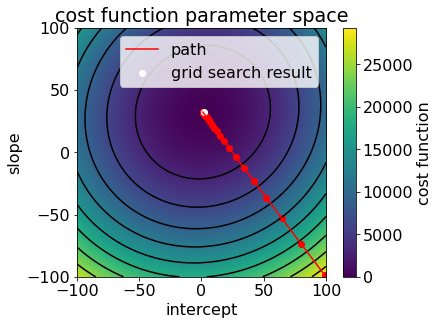

In [22]:
plt.figure(figsize=(6.4,4.8))
ax = plt.gca()
extent = (np.min(theta0),np.max(theta0),np.min(theta1),np.max(theta1))
fig = ax.imshow(cost.T,origin='lower',extent=extent,vmin=0)
plt.colorbar(fig,label='cost function')
ax.contour(theta0,theta1,cost.T,levels=10,colors='black')
plt.plot(theta_hist[::20,0],theta_hist[::20,1],color='r',label='path')
plt.scatter(theta_hist[::20,0],theta_hist[::20,1],c='r')
plt.scatter(theta0[min_coords[0]],theta1[min_coords[1]],c='w',label='grid search result')
ax.xaxis.set_ticks_position("bottom")
plt.legend()
plt.xlabel('intercept')
plt.ylabel('slope')
plt.title('cost function parameter space')
plt.tight_layout()
plt.savefig('figures/cost_function_with_path.png',dpi=300)
plt.show()

<center><img src="figures/cost_function_with_path.png" width="600"></center>

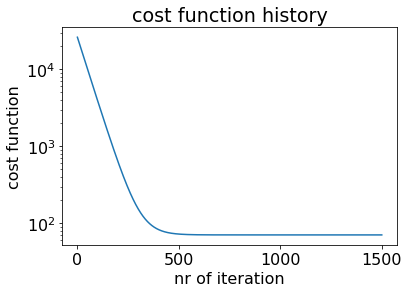

In [11]:
plt.plot(cost_history)
plt.semilogy()
plt.ylabel('cost function')
plt.xlabel('nr of iteration')
plt.title('cost function history')
plt.savefig('figures/cost_hist.png',dpi=300)
plt.show()

### DO NOT USE MY `gradient_descent` FUNCTION!
- it is for illustration purposes only
- it is much slower than the sklearn implemementation!

## Quiz 2

## <font color='LIGHTGRAY'>Supervised ML algorithms, part 1 </font>

<font color='LIGHTGRAY'>By the end of this lecture, you will be able to</font>
- <font color='LIGHTGRAY'>describe the main components of any ML algorithm</font>
- <font color='LIGHTGRAY'>describe how linear regression works</font>
- **describe how logistic regression works**


## Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression() # initialize a simple logistic regression model
LogReg.fit(X_train,y_train) # we will learn what happens when you issue this line in classification

- name is misleading, logistic regression is for classification problems!
- the model:

<center>$y_i' = \frac{1}{1+e^{-z}}$, where</center>

<center>$z = \theta_0 + \sum_{j=1}^{m} \theta_j  x_{ij}$</center>

$f(z) = \frac{1}{1+e^{-z}}$ is the sigmoid function.

- it is linear regression model but a sigmoid function is applied to its output

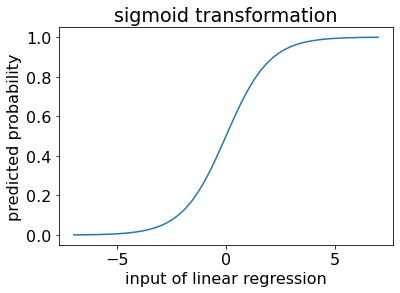

In [12]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

z = np.linspace(-7,7,50)

plt.plot(z,sigmoid(z))
plt.xlabel('input of linear regression')
plt.ylabel('predicted probability')
plt.title('sigmoid transformation')
plt.savefig('figures/sigmoid_trans.png',dpi=300)
plt.show()

## The cost function
- the logloss metric is used as a cost function in logistic regression

## <center>$L(\theta) = - \frac{1}{N}\sum_{i=1}^{n} [y_i\ln(y_i') + (1-y_i)\ln(1-y_i')]$ </center>
## <center>$L(\theta) =  - \frac{1}{N}\sum_{i=1}^{n} [y_i\ln(\frac{1}{1+e^{-\theta_0 + \sum_{j=1}^{m} \theta_j  x_{ij}}}) + (1-y_i)\ln(1-\frac{1}{1+e^{-\theta_0 + \sum_{j=1}^{m} \theta_j  x_{ij}}})]$</center>

## Gradient descent
- the basic algorithm works but the `gradient_descent` function needs to be updated because the cost function changed!
- repeat until convergence:
<center>$\theta_j := \theta_j - l \frac{\partial L(\theta)}{\partial \theta_j} $, </center>
<center>where $\frac{\partial L(\theta)}{\partial \theta_j}$ is the gradient of the cost function at the current $\theta$ location and $l$ is the learning rate.</center>

## Mud card